In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. DataSet Aleatoire

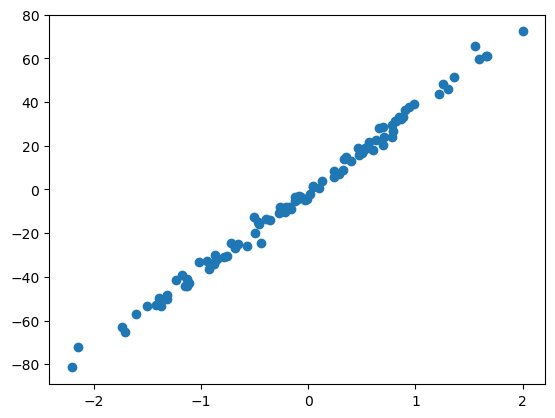

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 3)
plt.scatter(x, y)

In [3]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)
##print(x,"\n\n", y)

(100, 1)
(100, 1)


In [4]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [5]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

## Model

In [6]:
def model(X, theta):
    return (X.dot(theta))

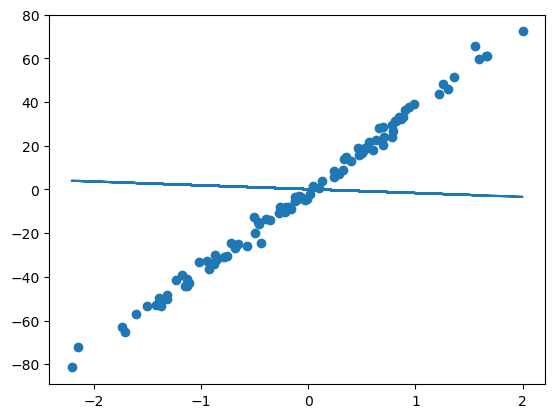

In [7]:
plt.scatter(x, y)
plt.plot(x, model(X, theta))

## Cost Function

In [8]:
def cost_func(X, y, theta):
    m = len(y)
    n = 1/ (2* m) * np.sum(np.power(model(X, theta) - y, 2))
    return n

In [9]:
cost_func(X, y, theta)

## Gradient Descente du Gradiant


In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * (X.T.dot(model(X, theta) - y))

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_ite):
    for i in range(0, n_ite):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta




## Machine_learning

In [12]:
theta_final = gradient_descent(X, y, theta, learning_rate= 0.01, n_ite = 1000)

(100, 2)
(100, 1)


In [13]:
theta_final

array([[36.78923508],
       [-0.2233438 ]])

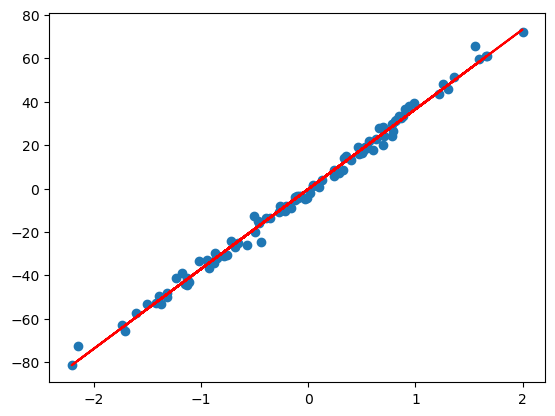

In [14]:
prediction = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c = 'r')

## Coefficent determination

In [15]:
def coef_det(x, pred):
    u = np.power((y - pred), 2).sum()
    v = np.power((y - y.mean()), 2).sum()
    return 1 - u/v

In [16]:
coef_determination = coef_det(y, prediction)
print(coef_determination)

0.9940002494298812


## Import data for reg_lin

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('data.csv', delimiter=",")

In [19]:
data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


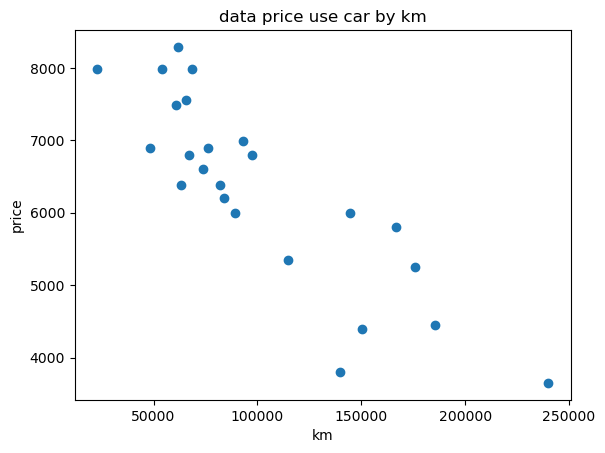

In [20]:
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.show()

(24, 1)
(24, 1)
24
(24, 2)
(24, 1)
[[nan]
 [nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


/var/folders/3f/db9yvw7s0c39qvjz5xlq60s80000gn/T/ipykernel_66732/1436344740.py:3: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad(X, y, theta)


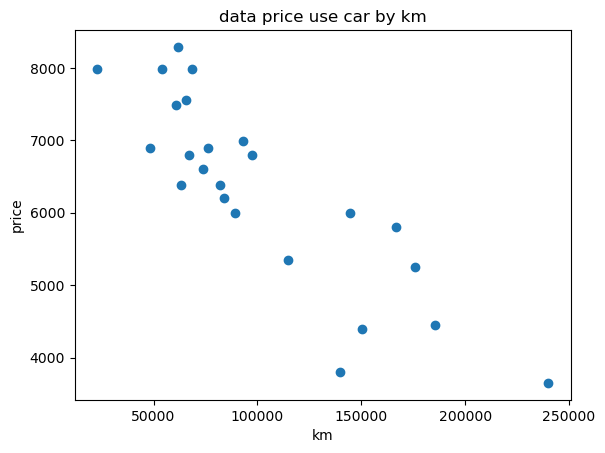

In [21]:
theta = np.zeros((2, 1))
x = data['km']
y = data['price']


x = x.values.reshape(x.shape[0], 1)
y = y.values.reshape(y.shape[0], 1)


X = np.hstack((x, np.ones(x.shape)))
theta_final = gradient_descent(X, y, theta, learning_rate= 0.00000001, n_ite = 300)

print(theta_final)

prediction = model(X, theta_final)
print(prediction)
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.plot(x, prediction , c = 'r')